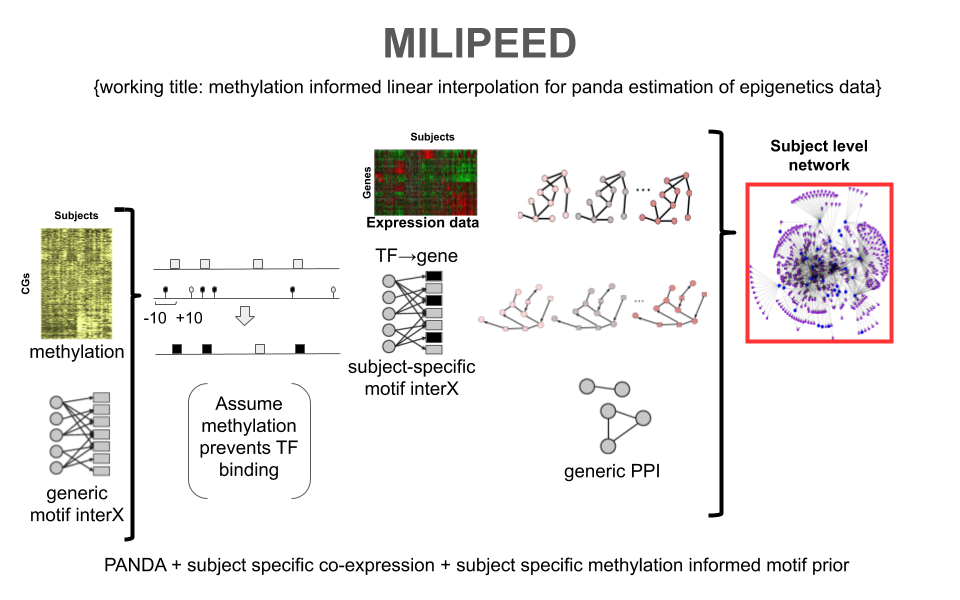

In [2]:
Image(filename='../../../analyses/MILIPEED/MILIPEED_workflow.png')

In [3]:
import re, netZooPy, graphviz, glob, os, collections
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from netZooPy.panda import Panda
# from netZooPy.lioness import Lioness
from netZooPy.milipeed import Milipeed
# from netZooPy.milipeed.working_milipeed_beta import Milipeed
from netZooPy.milipeed.analyze_milipeed import AnalyzeMilipeed
from netZooPy.milipeed.validate_milipeed import ValidateMilipeed
# from IPython.display import Image

ModuleNotFoundError: No module named 'graphviz'

# add subject headings to Expression data

In [145]:
expression_data = pd.read_csv('~/netZooPy/tests/puma/ToyData/ToyExpressionData.txt', sep='\t', header=None, index_col=0)
expression_genes = expression_data.index.tolist()
exp = np.arange(0,expression_data.shape[1])
str2 = 'Subj_'
str2 += '% s'
list =  [str2 % i for i in exp]
expression_data.columns=list
expression_data.to_csv('~/netZooPy/tests/milipeed/ToyData/ToyExpressionData_Subj.txt',sep='\t',header=True)

# similarly make Methylation toy data with subject headings

In [98]:
methylation_data=pd.DataFrame(np.round_(np.random.uniform(low=0, high=100, size=(10000,60)), decimals=4))
# methylation_data.index=(expression_data.index.tolist()+pd.util.testing.rands_array(5, 500).tolist())
tmp=np.random.randint(0,10000000,size=10000)
methylation_map = pd.read_csv('~/netZooPy/tests/milipeed/MotifPrior_CGmap.txt', sep='\t', header=None,index_col=2)
tmp2=[str(item).zfill(8) for item in tmp]
strr = 'cg'
strr += '% s'
cglist =  [strr % i for i in tmp2]
index = np.random.choice(100, 100, replace=False) ##sample from true cgs to increase return form purely random
cglist=cglist[100:]+methylation_map.index[index].tolist()
methylation_data.index=cglist
methyl = np.arange(0,methylation_data.shape[1])
strr = 'Subj_'
strr += '% s'
list =  [strr % i for i in methyl]
methylation_data.columns=list
methylation_data=methylation_data/100
methylation_data.to_csv('~/netZooPy/tests/milipeed/ToyData/ToyMethylationData.txt',sep='\t',header=True)

In [400]:
self=Milipeed('~/netZooPy/tests/milipeed/ToyData/ENC_exp.txt','~/netZooPy/tests/milipeed/ToyData/ToyMethylationData.txt',
         '~/netZooPy/tests/puma/ToyData/ToyPPIData.txt',start=1,end=3)

Loading methylation data ...
Methylation matrix: (1679, 62)
  Elapsed time: 1.14 sec.
Loading mapping data ...
  Elapsed time: 0.65 sec.
Loading expression data ...
Expression matrix: (46450, 7)
  Elapsed time: 0.12 sec.
Loading PPI data ...
Number of PPIs: 238
  Elapsed time: 0.03 sec.
(83, 0)


In [ ]:
self=Milipeed(None,'~/netZooPy/tests/milipeed/ToyData/ToyMethylationData.txt',
         '../../../analyses/MILIPEED/ppi.txt,start=1,end=3)

In [3]:
self=Milipeed('/udd/redmo/analyses/MILIPEED/gene_exp_v14c.txt',
#          '/udd/redmo/analyses/MILIPEED/wMotifPrior.txt',
        '/udd/redmo/analyses/MILIPEED/betas_V13form_tr.txt',
         '/udd/redmo/analyses/MILIPEED/ppi.txt',
        save_dir='/udd/redmo/analyses/MILIPEED/milipeed_output', save_fmt='txt')



Loading methylation data ...
Methylation matrix: (0, 4)
  Elapsed time: 1.01 sec.
Loading mapping data ...
  Elapsed time: 0.10 sec.
Loading expression data ...
Expression matrix: (25627, 151)
  Elapsed time: 1.42 sec.
Loading PPI data ...
  Elapsed time: 2.77 sec.


KeyboardInterrupt: 

In [ ]:
self=Milipeed('/udd/redmo/netZooPy/tests/milipeed/ToyData/ENCODEExpressionData_Subj.txt',
#          '/udd/redmo/analyses/MILIPEED/wMotifPrior.txt',
        '/udd/redmo/analyses/MILIPEED/betas_V13form_tr.txt',
         '/udd/redmo/analyses/MILIPEED/ppi.txt',
        save_dir='/udd/redmo/netZooPy/tests/milipeed/milipeed_output', save_fmt='txt')



### MILIPEED MOTIF from remap motif-wgbs-chip intersect

In [415]:
append_data = pd.DataFrame()
# path='/udd/redmo/data/MotifPipeline/val_mili_plusNONcpg/A-549*'
# path='/udd/redmo/data/MotifPipeline/validate_milipeed/'
traces= glob.glob('/udd/redmo/data/MotifPipeline/val_mili_plusNONcpg/A-549*')
for j,trace in enumerate(traces):
    filepath = os.path.join(path, trace)
    data=pd.read_csv(filepath,sep='\t',usecols=[0,1,2,5,6,11,12],names=['chr','start','end','weight','wgbs','target','ChIP'])##test 7 for 6 too
    data.wgbs=data.wgbs.replace('.','0')
    data.target=data.target.replace('.','0')
    data2=data.copy()
    data2['TF']=os.path.basename(trace).split('_')[1] 
#     data2['wgbs']=1-data2['wgbs']
    df=data2.groupby([data2.chr,data2.start,data2.end,data2.target]).size().reset_index(name='counts')
    data3 = data2.groupby([data2.chr,data2.start,data2.end,data2.target]).agg({'weight':'mean',"wgbs":'mean','ChIP':'first','TF':'first'})
    data3=data3.merge(df,on=['chr','start','end','target'])

    del data3['counts']
#     data3

#     if j==0:
#         append_data=pd.DataFrame(data3)
#     else:
#         append_data=pd.concat([append_data,pd.DataFrame(data3)],axis=0)
    append_data=append_data.append(data3,ignore_index=True)
    

In [421]:
reg=append_data[append_data['target']!=append_data['TF']]
len(pd.unique(reg['TF']))

6

### start working on encode expression data per cell line

In [84]:
# from biomart import BiomartServer
# ensembl_data = pd.DataFrame()
# atts = ['external_gene_name','external_gene_source','ensembl_gene_id',
#         'ensembl_transcript_id','ensembl_peptide_id']

# server = BiomartServer("http://www.ensembl.org/biomart")
# hge = server.datasets['hsapiens_gene_ensembl']

# print(server.databases['ENSEMBL_MART_ENSEMBL'])
# s = hge.search({'attributes': atts}, header=1)
# for l in s.iter_lines():
# #     print(l)
#     ensembl_data=ensembl_data.append(pd.DataFrame(l.decode("utf-8").split('\t')).T,ignore_index=True)
# ensembl_data.columns=ensembl_data.iloc[0]
# ensembl_data.to_csv('/udd/redmo/netZooPy/tests/milipeed/ToyData/ToyMethylationMeta.txt',sep='\t',header=True)



Ensembl Genes 99


In [394]:
A549_exp_data1= pd.read_csv('/udd/redmo/data/MotifPipeline/ENCODE/expression/SK-N-SH_exp_ENCFF161JEA.tsv',index_col=None,sep='\t',header=0)
A549_exp_data2= pd.read_csv('/udd/redmo/data/MotifPipeline/ENCODE/expression/SK-N-SH_exp+ENCFF389TFR.tsv',index_col=None,sep='\t',header=0)

A549_exp_data1=A549_exp_data1[A549_exp_data1['effective_length']!=0]
A549_exp_data2=A549_exp_data2[A549_exp_data2['effective_length']!=0]

A549_exp_data2['FPKM']=(A549_exp_data1['FPKM']+A549_exp_data2['FPKM'])/2
A549_exp_data=A549_exp_data2.copy()
del A549_exp_data2, A549_exp_data1

A549_exp=A549_exp_data[['gene_id','FPKM']]
np.sort(ensembl_data['Gene stable ID'])

j=A549_exp[A549_exp['gene_id'].str.contains('ENSG')]


j['gene_id'] = j['gene_id'].map(lambda x: x.lstrip('ENSG').lstrip('R'))


# j.round({'gene_id':0})
j['gene_id']=j['gene_id'].astype('float64').round()

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [395]:
tmp2=[str(item).zfill(13) for item in j['gene_id']]
# tmp2 = [ '%.0f' % elem for elem in pd.to_numeric(tmp2) ]
# tmp2 = [ round(elem, 11) for elem in pd.to_numeric(tmp2) ]
strr = 'ENSG'
strr += '% s'
j['gene_id'] =  [strr % i for i in tmp2]

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [396]:
j['ID']=(j['gene_id'].str.split('.', expand=True).rename(columns=lambda x: f"string_{x+1}"))['string_1']


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [398]:
A549=j.merge(ensembl_data,left_on='ID',right_on='Gene stable ID')
out=A549[['Gene name','FPKM']]
# out=out.drop_duplicates()
# out.to_csv('/udd/redmo/data/MotifPipeline/ENCODE/expression/A549_exp.txt',sep='\t',index=False,header=False)


In [399]:
out=out.drop_duplicates()
out['FPKM']=(out['FPKM']/np.median(cc['FPKM']))
out.to_csv('/udd/redmo/data/MotifPipeline/ENCODE/expression/SK-N-SH_exp_median_spike.txt',sep='\t',index=False,header=False)


In [363]:
(out['FPKM']/np.median(cc['FPKM']))

0         15.373232
5         13.654516
11         1.973885
16         5.920566
25         0.000000
            ...    
188359     0.000000
188360     0.000000
188361     0.013058
188362     0.000000
188363     0.000000
Name: FPKM, Length: 46062, dtype: float64

In [358]:
# j=A549_exp[A549_exp['gene_id'].str.contains('Spike')]
# cc=(j[j['FPKM']!=0])
# plt.violinplot(cc['FPKM'],showmedians=True)
np.mean(cc['FPKM'])

84.825625

### process metadata

In [ ]:
metadata = pd.read_csv('/udd/redmo/analyses/MILIPEED/subj_metadata.txt',sep='\t',header=0)
metadata.columns=['ID','age','sex','BMI','FEV','PY']
metadata['COPD'] = np.where(metadata['FEV']>.7, 'COPD', 'NO')
metadata['age_range'] = np.where(metadata['age']<50, 'fourties', np.where(metadata['age']<60,
        'fifties',np.where(metadata['age']<70,'sixties',np.where(metadata['age']<80,'seventies','eighties'))))
metadata.set_index('ID', inplace=True)

In [ ]:
milipeed_obj.subjects

In [ ]:
appended_data = []
path='/udd/redmo/analyses/MILIPEED/milipeed_output'
traces= os.listdir(path)
for j,trace in enumerate(traces):
    filepath = os.path.join(path, trace)
    data=pd.melt(pd.DataFrame(np.load(filepath)))
    if j==0:
        append_data=pd.DataFrame(data.value)
    else:
        append_data=pd.concat([append_data,pd.DataFrame(data.value)],axis=1)
    #     appended_data.append(data)
# appended_data = pd.concat(appended_data)

### load data

In [ ]:
appended_data = []
path='/udd/redmo/analyses/MILIPEED/milipeed_output'
traces= os.listdir(path)
for j,trace in enumerate(traces):
    filepath = os.path.join(path, trace)
    data=pd.melt(pd.DataFrame(np.load(filepath)))
    if j==0:
        append_data=pd.DataFrame(data.value)
    else:
        append_data=pd.concat([append_data,pd.DataFrame(data.value)],axis=1)
    #     appended_data.append(data)
# appended_data = pd.concat(appended_data)

### restrict analysis to GWAS genes/TFs

In [ ]:
COPD_GWAS_genes = pd.read_csv("/udd/redmo/analyses/MILIPEED/COPD_GWAS_genes.csv",usecols=[0])
gwasTF=JJ[JJ['TF'].isin(COPD_GWAS_genes.closest_gene)]
gwasgene=JJ[JJ['gene'].isin(COPD_GWAS_genes.closest_gene)]
gwasONLY=gwasTF[gwasTF['gene'].isin(COPD_GWAS_genes.closest_gene)]

In [ ]:
# ValidateMilipeed.
%% bash
eval "./netZooPy/netZooPy/milipeed/run_validation.sh('./K562_analysis',
                '/udd/redmo/data/MotifPipeline/remap/',
                '/udd/redmo/data/MotifPipeline/hg19_refseq_100gb_tr',
                '/udd/redmo/data/MotifPipeline/ENCODE/wgbsin/ENCFF005TID_hg19.txt')"




In [ ]:
remap_chip = pd.read_csv("/udd/redmo/data/MotifPipeline/remap/hg38_remap_ChIP.txt",sep=' ',names=['chr','start','end','info'])
lines = pd.read_csv("/udd/redmo/data/MotifPipeline/ENCODE/wgbsin/cellline_meta.txt",sep='\t',names=['info','cell','temp'])
remap_chip['gene']=(remap_chip['info'].str.split(':', expand=True).rename(columns=lambda x: f"string_{x+1}"))['string_1']
# remap_chip['cell']=(remap_chip['info'].str.split(':', expand=True).rename(columns=lambda x: f"string_{x+1}"))['string_2']
cc=np.unique(lines['cell'])
for c in cc:
    j=remap_chip[remap_chip['info'].str.contains(c)]
    del j['info']
    j.to_csv(('/udd/redmo/data/MotifPipeline/remap/'+c+'.txt'),sep='\t',header=False,index=False)



In [ ]:

path='/udd/redmo/data/MotifPipeline/ENCODE/wgbsin/*.bed.gz'
files = pd.read_csv('/udd/redmo/data/MotifPipeline/ENCODE/wgbsin/cellline_CpG_encode.txt')
# tfdb=pd.read_csv('~/analyses/SPIDER/cisbp_nams_689_unique_hgnc_symbol.txt',sep='\t',names=['motif','TF'])
traces= os.listdir(path)
for j,trace in enumerate(traces):
    filepath = os.path.join(path, trace)

### LM on lioness output

In [32]:
AnalyzeMilipeed('/udd/redmo/analyses/MILIPEED/milipeed_output')

KeyboardInterrupt: 

In [ ]:
for j,trace in enumerate(traces):
    filepath = os.path.join(path, trace)

    data=pd.melt(pd.DataFrame(np.load(filepath,mmap_mode='r')))
    append_data=append_data.append(pd.DataFrame(data.value),ignore_index=True)
    self.population=pd.concat([metadata,append_data.T],axis=1,sort=True) ## hopefully this works, untested on small jupyter        
    for covariate in self.metadata.columns: ##all other covariates to numeric
    self.population[covariate]=pd.to_numeric(self.population[covariate])
    # self.population['PY']=pd.to_numeric(self.population['PY'])
    self.population=self.population.round({'age':0})
    if self.population['age'] is not object: ##convert 
    self.population['age']=self.population['age'].astype(object)
    self.date="{:%d.%m.%Y}".format(datetime.now())

    self.milipeed_analysis= self.__analysis_loop()

In [48]:
path='/udd/redmo/analyses/SPIDER/lioness_output'
# tfdb=pd.read_csv('~/analyses/SPIDER/cisbp_nams_689_unique_hgnc_symbol.txt',sep='\t',names=['motif','TF'])
traces= glob.glob('/udd/redmo/analyses/SPIDER/lioness_output/*.npy')
for j,trace in enumerate(traces):
#     filepath = os.path.join(path, trace)
    data=np.load(trace)
#     data=data.round(3)
    outfile='lioness.'+os.path.basename(trace).split('.')[1]+'.txt'
    outpath = os.path.join('/udd/redmo/analyses/SPIDER/lioness_output2/', outfile)
    pd.melt(pd.DataFrame(data)).value.to_csv(outpath,sep='\t',float_format='%1.4f',index=False)
#     dato_csv(outpath,sep='\t',header=False,index=False)


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



In [65]:
subj='/udd/redmo/analyses/MILIPEED/milipeed_output/mili_subj.txt'
meta='/udd/redmo/analyses/MILIPEED/subj_metadata.txt'

In [66]:
metadata = pd.read_csv(meta,sep='\t',header=0,index_col=0)
subjmeta = pd.read_csv(subj,sep='\t',names=['subj'],index_col=0)

In [72]:
metadata.merge(subjmeta,left_on=metadata.index,right_on=subjmeta.index)

key_0   age sex    BMI  FEV1  packyears
0    ST-01016289  67.0   F  26.17  2.06       25.0
1    ST-01016292  65.0   M  25.25  4.12       20.0
2    ST-01016294  68.0   M  22.59  3.07       60.0
3    ST-01016295  74.0   F  30.47  1.70       45.0
4    ST-01011841  56.0   M  25.74  0.50       60.0
..           ...   ...  ..    ...   ...        ...
142  ST-01013964  67.0   F  26.79   NaN       34.0
143  ST-01013429  72.0   F  24.94  0.57      104.0
144  ST-01013398  68.0   M  30.92  0.95       90.0
145  ST-01012921  53.0   F  29.25  0.64       36.0
146  ST-01013461  82.0   F  40.49  0.85       60.0

[147 rows x 6 columns]

In [3]:
import re, netZooPy, glob, os, collections 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from netZooPy.panda import Panda
from netZooPy.lioness import Lioness
from netZooPy.milipeed import Milipeed

In [2]:
os.chdir('/udd/redmo/netZooPy')

In [3]:
data = pd.read_csv('tests/milipeed/ToyData/ENCODE_5cell_pwm_wgbs_chip.txt', sep='\t', header=0)
data['TF']=(data['link'].str.split('_', expand=True).rename(columns=lambda x: f"string_{x+1}"))['string_1']
data['gene']=(data['link'].str.split('_', expand=True).rename(columns=lambda x: f"string_{x+1}"))['string_2']
data2=data[['TF','gene','A549_wgbs','HELAS3_wgbs','HEPG2_wgbs','K562_wgbs','SKNSH_wgbs']]

data2.columns=['source','target','A549','HELA3S','HEPG2','K562','SKNSH']


data2.to_csv('tests/milipeed/ToyData/encode_wgbs_weight.txt',sep='\t',index=False)


In [32]:
self=Milipeed('tests/milipeed/ToyData/ENCODEExpressionData_Subj.txt',
#          '/udd/redmo/analyses/MILIPEED/wMotifPrior.txt',
        'tests/milipeed/ToyData/encode_wgbs_weight.txt',
         'tests/milipeed/ToyData/ppi.txt',motif_file=None,
        save_dir='tests/milipeed/ToyData/', save_fmt='txt')

Methylation matrix: (52, 7)
Loading PPI data ...
Number of PPIs: 84388
  Elapsed time: 0.06 sec.
Loading expression data ...
Expression matrix: (43435, 7)
  Elapsed time: 0.08 sec.
(11, 7)
Running MILIPEED for subject 1:
Calculating coexpression network ...
  Elapsed time: 0.00 sec.
Creating motif network ...
  Elapsed time: 0.00 sec.
Creating PPI network ...
  Elapsed time: 0.09 sec.
step: 0, hamming: 0.602455861059696
step: 1, hamming: 0.46836887251495884
step: 2, hamming: 0.38377798583986
step: 3, hamming: 0.3247177883952831
step: 4, hamming: 0.28449421551114024
step: 5, hamming: 0.2671083969994909
step: 6, hamming: 0.25924481460837984
step: 7, hamming: 0.2557603295752997
step: 8, hamming: 0.25095227974463874
step: 9, hamming: 0.24122948300949032
step: 10, hamming: 0.22458362365991705
step: 11, hamming: 0.20458633608684496
step: 12, hamming: 0.183291474997723
step: 13, hamming: 0.16090446830317917
step: 14, hamming: 0.13904910861252764
step: 15, hamming: 0.11871968650245385
step: 16

/udd/redmo/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/udd/redmo/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [26]:
data2 = pd.read_csv('tests/milipeed/ToyData/encode_wgbs_weight.txt', sep='\t', header=0)
pd.unique(data2.gene)


array(['CHD2', 'CTCF', 'EP300', 'GABPA', 'JUND', 'MAX', 'RAD21', 'RCOR1',
       'REST', 'RFX5', 'SMC3', 'TAF1', 'USF2'], dtype=object)

In [6]:
data = pd.read_csv('tests/milipeed/ToyData/ENCODEExpressionData_Subj.txt', sep='\t', header=0)
print(pd.unique(data.gene.T))


['TSPAN6' 'DPM1' 'SCYL3' ... 'RARRES2P11' 'AC022726.2' nan]


In [8]:
data[data.gene=='CHD2']

gene                A549   GM12878                  H1 HELAS3  \
11500  CHD2  20.423286180631116  0.946681  2.2937976060935794    0.0   

                    HEPG2      K562      SKNSH  
11500  123.74102285092488  0.010881  34.535365

In [8]:
data2.columns[2:len(data2.columns)]

Index(['A549', 'HELA3S', 'HEPG2', 'K562', 'SKNSH'], dtype='object')

In [16]:
data=data.dropna()

In [17]:
data['genes']=(data['gene'].str.split('.', expand=True).rename(columns=lambda x: f"string_{x+1}"))['string_1']


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
del data['gene']

In [23]:
data=data[['genes','A549','GM12878','H1','HELAS3','HEPG2','K562','SKNSH']]

In [24]:
data.to_csv('tests/milipeed/ToyData/ENCODEExpressionData_Subj.txt',sep='\t',index=False)


In [29]:
data2['target']=data2.iloc[:,1]

In [31]:
del data2.iloc[:,1]
data2

AttributeError: __delitem__

In [48]:

# path='data/MotifPipeline/val_mili_plusNONcpg/*'
traces= glob.glob('data/MotifPipeline/val_mili_plusNONcpg/redo/*')

for j,trace in enumerate(traces):
#     filepath = os.path.join(path, trace)
    data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,5,6,11,12],names=['chr','start','end','weight','wgbs','target','ChIP'])##test 7 for 6 too
    data['ChIP']=data['ChIP'].str.replace('.','0')
    data.to_csv(trace,sep='\t',header=False,index=False)
    

In [41]:
enumerate(traces[474:len(traces)])

In [47]:
traces[0:4]

['data/MotifPipeline/val_mili_plusNONcpg/K-562_REST',
 'data/MotifPipeline/val_mili_plusNONcpg/K-562_POU5F1',
 'data/MotifPipeline/val_mili_plusNONcpg/GM12878_NR2C1',
 'data/MotifPipeline/val_mili_plusNONcpg/GM12878_FOXM1']